In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import wrds
conn = wrds.Connection (wrds_username='haochengyang')

Loading library list...
Done


In [2]:
comp = conn.raw_sql('''
                    SELECT gvkey,conm, fyear, datadate,sich,sale,prcc_f,at,capx,xdp,dp,am
                    FROM compa.funda
                    WHERE indfmt='INDL' 
                    AND datafmt='STD' 
                    AND popsrc='D' 
                    AND consol = 'C'
                    AND fyear > 1985 
                    AND fyear < 2019
                    AND sale > 10
                    AND prcc_f > 1
                    ''', 
                    date_cols=['datadate'])
comp['fyear']=comp['fyear'].astype(int)
comp['datadate']=comp['datadate']+MonthEnd(0)
comp.describe(include='all')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\1085056569.py:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  comp.describe(include='all')


,gvkey,conm,fyear,datadate,sich,sale,prcc_f,at,capx,xdp,dp,am
count,189091,189091,189091.000000,189091,167427.000000,189091.000000,189091.000000,1.890160e+05,176511.000000,20240.000000,180406.000000,121102.000000
unique,19868,19866,NaN,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,003946,UNILEVER PLC,NaN,1999-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,41,NaN,5076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1986-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.005764,NaN,4758.425756,2867.665026,31.900443,9.777089e+03,215.170869,78.150409,163.141865,28.301655
std,NaN,NaN,8.957861,NaN,1916.478674,13140.883914,760.966338,8.385810e+04,1189.052574,364.592568,862.211200,232.468267
min,NaN,NaN,1986.000000,NaN,100.000000,10.001000,1.000500,5.130000e-01,-994.000000,0.000000,-7.909000,-113.746000
25%,NaN,NaN,1995.000000,NaN,3490.000000,59.576500,6.500000,1.037435e+02,1.705000,1.848750,2.002000,0.000000


In [3]:
comp

,gvkey,conm,fyear,datadate,sich,sale,prcc_f,at,capx,xdp,dp,am
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,36.308,4.500000,14.586,0.548,NaN,0.529,NaN
1,001004,AAR CORP,1986,1987-05-31,NaN,298.192,30.374974,235.091,10.688,4.766,5.374,0.608
2,001009,ABS INDUSTRIES INC,1986,1986-10-31,NaN,19.266,17.499973,14.160,0.510,0.669,0.669,0.000
3,001012,ACS INDUSTRIES INC,1986,1986-10-31,NaN,23.949,3.875000,14.549,1.796,0.973,0.973,0.000
4,001013,ADC TELECOMMUNICATIONS INC,1986,1986-10-31,NaN,143.677,20.250000,85.079,10.085,6.633,6.633,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,34.280,5.640000,78.453,1.244,NaN,1.315,0.460
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,2213.600,22.460000,4552.700,39.500,NaN,97.100,60.900
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,319.018,6.240000,447.627,0.368,NaN,14.291,0.017
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,133.921,2.830000,413.527,170.503,NaN,38.552,33.146


In [4]:
comp.drop(['sale','xdp','prcc_f'], axis=1, inplace=True)
comp

,gvkey,conm,fyear,datadate,sich,at,capx,dp,am
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,14.586,0.548,0.529,NaN
1,001004,AAR CORP,1986,1987-05-31,NaN,235.091,10.688,5.374,0.608
2,001009,ABS INDUSTRIES INC,1986,1986-10-31,NaN,14.160,0.510,0.669,0.000
3,001012,ACS INDUSTRIES INC,1986,1986-10-31,NaN,14.549,1.796,0.973,0.000
4,001013,ADC TELECOMMUNICATIONS INC,1986,1986-10-31,NaN,85.079,10.085,6.633,0.000
...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,78.453,1.244,1.315,0.460
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,4552.700,39.500,97.100,60.900
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,447.627,0.368,14.291,0.017
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,413.527,170.503,38.552,33.146


In [5]:
###load industry info
Ind = conn.raw_sql("""
                   select gvkey, sic
                   from compa.company
                     """)
Ind.describe()

,gvkey,sic
count,51794,50557
unique,51794,452
top,001000,6722
freq,1,5148


In [6]:
###merge it with compustat. here is like a reconcile process between sic and sich
comp = pd.merge(comp,Ind,on=['gvkey'])
comp

,gvkey,conm,fyear,datadate,sich,at,capx,dp,am,sic
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,14.586,0.548,0.529,NaN,5712
1,001003,A.A. IMPORTING CO INC,1987,1988-01-31,5712.0,16.042,0.523,0.516,0.000,5712
2,001003,A.A. IMPORTING CO INC,1988,1989-01-31,5712.0,16.280,0.296,0.692,0.000,5712
3,001004,AAR CORP,1986,1987-05-31,NaN,235.091,10.688,5.374,0.608,5080
4,001004,AAR CORP,1987,1988-05-31,5080.0,284.948,9.274,5.726,NaN,5080
...,...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,78.453,1.244,1.315,0.460,3674
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,4552.700,39.500,97.100,60.900,3440
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,447.627,0.368,14.291,0.017,4412
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,413.527,170.503,38.552,33.146,4412


In [7]:
comp.describe()

,fyear,sich,at,capx,dp,am
count,189091.000000,167427.000000,1.890160e+05,176511.000000,180406.000000,121102.000000
mean,2002.005764,4758.425756,9.777089e+03,215.170869,163.141865,28.301655
std,8.957861,1916.478674,8.385810e+04,1189.052574,862.211200,232.468267
min,1986.000000,100.000000,5.130000e-01,-994.000000,-7.909000,-113.746000
25%,1995.000000,3490.000000,1.037435e+02,1.705000,2.002000,0.000000
50%,2002.000000,4813.000000,4.324380e+02,10.021000,9.298500,0.167000
75%,2009.000000,6211.000000,2.025844e+03,63.182500,52.980500,4.223750
max,2018.000000,9998.000000,3.771200e+06,50233.741000,37321.980000,25198.481000


In [8]:
###combine sich and sic 
comp['sic'] = np.where(comp['sich']>0, comp['sich'], comp['sic'])
comp['sic']=comp['sic'].astype(int)
comp = comp.drop(['sich'],axis=1)
comp.describe()

,fyear,at,capx,dp,am,sic
count,189091.000000,1.890160e+05,176511.000000,180406.000000,121102.000000,189091.000000
mean,2002.005764,9.777089e+03,215.170869,163.141865,28.301655,4770.406355
std,8.957861,8.385810e+04,1189.052574,862.211200,232.468267,1915.289649
min,1986.000000,5.130000e-01,-994.000000,-7.909000,-113.746000,100.000000
25%,1995.000000,1.037435e+02,1.705000,2.002000,0.000000,3510.000000
50%,2002.000000,4.324380e+02,10.021000,9.298500,0.167000,4899.000000
75%,2009.000000,2.025844e+03,63.182500,52.980500,4.223750,6159.000000
max,2018.000000,3.771200e+06,50233.741000,37321.980000,25198.481000,9998.000000


In [9]:
comp['xdp']=comp['dp']-comp['am']
comp

,gvkey,conm,fyear,datadate,at,capx,dp,am,sic,xdp
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,14.586,0.548,0.529,NaN,5712,NaN
1,001003,A.A. IMPORTING CO INC,1987,1988-01-31,16.042,0.523,0.516,0.000,5712,0.516
2,001003,A.A. IMPORTING CO INC,1988,1989-01-31,16.280,0.296,0.692,0.000,5712,0.692
3,001004,AAR CORP,1986,1987-05-31,235.091,10.688,5.374,0.608,5080,4.766
4,001004,AAR CORP,1987,1988-05-31,284.948,9.274,5.726,NaN,5080,NaN
...,...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,1.315,0.460,3674,0.855
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,4552.700,39.500,97.100,60.900,3440,36.200
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,447.627,0.368,14.291,0.017,4412,14.274
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,413.527,170.503,38.552,33.146,4412,5.406


In [10]:
comp.describe()

,fyear,at,capx,dp,am,sic,xdp
count,189091.000000,1.890160e+05,176511.000000,180406.000000,121102.000000,189091.000000,117490.000000
mean,2002.005764,9.777089e+03,215.170869,163.141865,28.301655,4770.406355,146.075640
std,8.957861,8.385810e+04,1189.052574,862.211200,232.468267,1915.289649,776.094592
min,1986.000000,5.130000e-01,-994.000000,-7.909000,-113.746000,100.000000,-395.000000
25%,1995.000000,1.037435e+02,1.705000,2.002000,0.000000,3510.000000,1.814000
50%,2002.000000,4.324380e+02,10.021000,9.298500,0.167000,4899.000000,8.745500
75%,2009.000000,2.025844e+03,63.182500,52.980500,4.223750,6159.000000,47.967250
max,2018.000000,3.771200e+06,50233.741000,37321.980000,25198.481000,9998.000000,26667.000000


In [11]:
comp['xdpperc']=comp['xdp']/comp['at']
comp['amperc']=comp['am']/comp['at']
comp

,gvkey,conm,fyear,datadate,at,capx,dp,am,sic,xdp,xdpperc,amperc
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,14.586,0.548,0.529,NaN,5712,NaN,NaN,NaN
1,001003,A.A. IMPORTING CO INC,1987,1988-01-31,16.042,0.523,0.516,0.000,5712,0.516,0.032166,0.000000
2,001003,A.A. IMPORTING CO INC,1988,1989-01-31,16.280,0.296,0.692,0.000,5712,0.692,0.042506,0.000000
3,001004,AAR CORP,1986,1987-05-31,235.091,10.688,5.374,0.608,5080,4.766,0.020273,0.002586
4,001004,AAR CORP,1987,1988-05-31,284.948,9.274,5.726,NaN,5080,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,1.315,0.460,3674,0.855,0.010898,0.005863
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,4552.700,39.500,97.100,60.900,3440,36.200,0.007951,0.013377
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,447.627,0.368,14.291,0.017,4412,14.274,0.031888,0.000038
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,413.527,170.503,38.552,33.146,4412,5.406,0.013073,0.080154


In [12]:
comp.drop(['dp', 'xdp', 'am'], axis=1, inplace=True)
comp

,gvkey,conm,fyear,datadate,at,capx,sic,xdpperc,amperc
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,14.586,0.548,5712,NaN,NaN
1,001003,A.A. IMPORTING CO INC,1987,1988-01-31,16.042,0.523,5712,0.032166,0.000000
2,001003,A.A. IMPORTING CO INC,1988,1989-01-31,16.280,0.296,5712,0.042506,0.000000
3,001004,AAR CORP,1986,1987-05-31,235.091,10.688,5080,0.020273,0.002586
4,001004,AAR CORP,1987,1988-05-31,284.948,9.274,5080,NaN,NaN
...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,3674,0.010898,0.005863
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,4552.700,39.500,3440,0.007951,0.013377
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,447.627,0.368,4412,0.031888,0.000038
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,413.527,170.503,4412,0.013073,0.080154


In [13]:
comp1=comp.dropna()
comp1

,gvkey,conm,fyear,datadate,at,capx,sic,xdpperc,amperc
1,001003,A.A. IMPORTING CO INC,1987,1988-01-31,16.042,0.523,5712,0.032166,0.000000
2,001003,A.A. IMPORTING CO INC,1988,1989-01-31,16.280,0.296,5712,0.042506,0.000000
3,001004,AAR CORP,1986,1987-05-31,235.091,10.688,5080,0.020273,0.002586
5,001004,AAR CORP,1988,1989-05-31,356.391,10.365,5080,0.017276,0.000783
6,001004,AAR CORP,1989,1990-05-31,388.521,18.415,5080,0.017721,0.000762
...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,3674,0.010898,0.005863
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,4552.700,39.500,3440,0.007951,0.013377
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,447.627,0.368,4412,0.031888,0.000038
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,413.527,170.503,4412,0.013073,0.080154


In [14]:
gb=comp1.groupby('fyear', as_index=False)['xdpperc'].mean()
gb

,fyear,xdpperc
0,1986,0.045050
1,1987,0.043907
2,1988,0.043987
3,1989,0.045081
4,1990,0.046044
5,1991,0.046607
6,1992,0.046023
7,1993,0.045140
8,1994,0.043989
9,1995,0.043161


In [15]:
gb1=comp1.groupby('fyear', as_index=False)['amperc'].mean()
gb1

,fyear,amperc
0,1986,0.001588
1,1987,0.002293
2,1988,0.002622
3,1989,0.002947
4,1990,0.003254
5,1991,0.003601
6,1992,0.004367
7,1993,0.004628
8,1994,0.004037
9,1995,0.003985


In [16]:
m1 = pd.merge(gb, gb1, how='left', on=['fyear'])
m1

,fyear,xdpperc,amperc
0,1986,0.045050,0.001588
1,1987,0.043907,0.002293
2,1988,0.043987,0.002622
3,1989,0.045081,0.002947
4,1990,0.046044,0.003254
5,1991,0.046607,0.003601
6,1992,0.046023,0.004367
7,1993,0.045140,0.004628
8,1994,0.043989,0.004037
9,1995,0.043161,0.003985


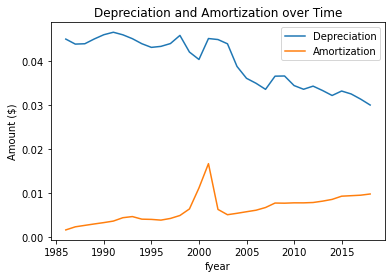

In [17]:
import matplotlib.pyplot as plt
plt.plot(m1['fyear'], m1['xdpperc'], label='Depreciation')
plt.plot(m1['fyear'], m1['amperc'], label='Amortization')

# Add axis labels and a title
plt.xlabel('fyear')
plt.ylabel('Amount ($)')
plt.title('Depreciation and Amortization over Time')

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [18]:
conn = wrds.Connection (wrds_username='haochengyang')
comp2 = conn.raw_sql('''
                    SELECT gvkey,conm, fyear, datadate,sich,sale,at,capx,xrd
                    FROM compa.funda
                    WHERE indfmt='INDL' 
                    AND datafmt='STD' 
                    AND popsrc='D' 
                    AND consol = 'C'
                    AND fyear > 1985 
                    AND fyear < 2019
                    AND sale > 10
                    AND prcc_f > 1
                    ''', 
                    date_cols=['datadate'])
comp2['fyear']=comp['fyear'].astype(int)
comp2['datadate']=comp['datadate']+MonthEnd(0)
comp2.describe(include='all')

Loading library list...
Done


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\4176132315.py:17: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  comp2.describe(include='all')


,gvkey,conm,fyear,datadate,sich,sale,at,capx,xrd
count,189091,189091,189091.000000,189091,167427.000000,189091.000000,1.890160e+05,176511.000000,85368.000000
unique,19868,19866,NaN,396,NaN,NaN,NaN,NaN,NaN
top,003946,UNILEVER PLC,NaN,1999-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,33,41,NaN,5076,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1986-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.005764,NaN,4758.425756,2867.665026,9.777089e+03,215.170869,120.321161
std,NaN,NaN,8.957861,NaN,1916.478674,13140.883914,8.385810e+04,1189.052574,637.552787
min,NaN,NaN,1986.000000,NaN,100.000000,10.001000,5.130000e-01,-994.000000,-0.648000
25%,NaN,NaN,1995.000000,NaN,3490.000000,59.576500,1.037435e+02,1.705000,0.143000


In [19]:
comp2

,gvkey,conm,fyear,datadate,sich,sale,at,capx,xrd
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,36.308,14.586,0.548,NaN
1,001004,AAR CORP,1987,1988-01-31,NaN,298.192,235.091,10.688,NaN
2,001009,ABS INDUSTRIES INC,1988,1989-01-31,NaN,19.266,14.160,0.510,NaN
3,001012,ACS INDUSTRIES INC,1986,1987-05-31,NaN,23.949,14.549,1.796,0.189
4,001013,ADC TELECOMMUNICATIONS INC,1987,1988-05-31,NaN,143.677,85.079,10.085,12.982
...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,34.280,78.453,1.244,5.306
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,2213.600,4552.700,39.500,45.600
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,319.018,447.627,0.368,NaN
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,133.921,413.527,170.503,NaN


In [20]:
###load industry info
Ind = conn.raw_sql("""
                   select gvkey, sic
                   from compa.company
                     """)
Ind.describe()

,gvkey,sic
count,51794,50557
unique,51794,452
top,001000,6722
freq,1,5148


In [21]:
###merge it with compustat. here is like a reconcile process between sic and sich
comp2 = pd.merge(comp2,Ind,on=['gvkey'])
comp2

,gvkey,conm,fyear,datadate,sich,sale,at,capx,xrd,sic
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,36.308,14.586,0.548,NaN,5712
1,001003,A.A. IMPORTING CO INC,1992,1992-12-31,5712.0,37.356,16.042,0.523,NaN,5712
2,001003,A.A. IMPORTING CO INC,2014,2014-12-31,5712.0,32.808,16.280,0.296,NaN,5712
3,001004,AAR CORP,1987,1988-01-31,NaN,298.192,235.091,10.688,NaN,5080
4,001004,AAR CORP,1993,1993-12-31,5080.0,347.640,284.948,9.274,NaN,5080
...,...,...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,34.280,78.453,1.244,5.306,3674
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,2213.600,4552.700,39.500,45.600,3440
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,319.018,447.627,0.368,NaN,4412
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,133.921,413.527,170.503,NaN,4412


In [22]:
###combine sich and sic 
comp2['sic'] = np.where(comp2['sich']>0, comp2['sich'], comp2['sic'])
comp2['sic']=comp2['sic'].astype(int)
comp2 = comp2.drop(['sich'],axis=1)
comp2.describe()

,fyear,sale,at,capx,xrd,sic
count,189091.000000,189091.000000,1.890160e+05,176511.000000,85368.000000,189091.000000
mean,2002.005764,2867.665026,9.777089e+03,215.170869,120.321161,4770.406355
std,8.957861,13140.883914,8.385810e+04,1189.052574,637.552787,1915.289649
min,1986.000000,10.001000,5.130000e-01,-994.000000,-0.648000,100.000000
25%,1995.000000,59.576500,1.037435e+02,1.705000,0.143000,3510.000000
50%,2002.000000,234.401000,4.324380e+02,10.021000,5.213000,4899.000000
75%,2009.000000,1108.621000,2.025844e+03,63.182500,29.819250,6159.000000
max,2018.000000,511729.000000,3.771200e+06,50233.741000,28837.000000,9998.000000


In [23]:
comp2.drop(['sale'], axis=1, inplace=True)
comp2

,gvkey,conm,fyear,datadate,at,capx,xrd,sic
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,14.586,0.548,NaN,5712
1,001003,A.A. IMPORTING CO INC,1992,1992-12-31,16.042,0.523,NaN,5712
2,001003,A.A. IMPORTING CO INC,2014,2014-12-31,16.280,0.296,NaN,5712
3,001004,AAR CORP,1987,1988-01-31,235.091,10.688,NaN,5080
4,001004,AAR CORP,1993,1993-12-31,284.948,9.274,NaN,5080
...,...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,5.306,3674
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,4552.700,39.500,45.600,3440
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,447.627,0.368,NaN,4412
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,413.527,170.503,NaN,4412


In [24]:
comp2 = comp2.dropna()
comp2

,gvkey,conm,fyear,datadate,at,capx,xrd,sic
45,001012,ACS INDUSTRIES INC,1986,1987-05-31,14.549,1.796,0.189,3357
46,001012,ACS INDUSTRIES INC,1995,1995-12-31,16.858,2.276,0.178,3357
47,001012,ACS INDUSTRIES INC,1986,1986-12-31,21.633,1.865,0.196,3357
48,001012,ACS INDUSTRIES INC,1996,1996-06-30,22.216,1.341,0.201,3357
49,001013,ADC TELECOMMUNICATIONS INC,1987,1988-05-31,85.079,10.085,12.982,3661
...,...,...,...,...,...,...,...,...
189079,245207,GENMAB AS,2018,2018-12-31,1297.705,10.996,219.504,2836
189082,282363,BIOFRONTERA AG,2018,2018-12-31,44.803,0.587,5.068,2836
189084,293919,STRONGBRIDGE BIOPHARMA PLC,2018,2019-03-31,170.285,0.326,25.441,2836
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,5.306,3674


In [25]:
comp2['capxperc']=comp2['capx']/comp2['at']
comp2['xrdperc']=comp2['xrd']/comp2['at']
comp2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\3571966493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp2['capxperc']=comp2['capx']/comp2['at']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\3571966493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp2['xrdperc']=comp2['xrd']/comp2['at']


,gvkey,conm,fyear,datadate,at,capx,xrd,sic,capxperc,xrdperc
45,001012,ACS INDUSTRIES INC,1986,1987-05-31,14.549,1.796,0.189,3357,0.123445,0.012991
46,001012,ACS INDUSTRIES INC,1995,1995-12-31,16.858,2.276,0.178,3357,0.135010,0.010559
47,001012,ACS INDUSTRIES INC,1986,1986-12-31,21.633,1.865,0.196,3357,0.086211,0.009060
48,001012,ACS INDUSTRIES INC,1996,1996-06-30,22.216,1.341,0.201,3357,0.060362,0.009048
49,001013,ADC TELECOMMUNICATIONS INC,1987,1988-05-31,85.079,10.085,12.982,3661,0.118537,0.152588
...,...,...,...,...,...,...,...,...,...,...
189079,245207,GENMAB AS,2018,2018-12-31,1297.705,10.996,219.504,2836,0.008473,0.169148
189082,282363,BIOFRONTERA AG,2018,2018-12-31,44.803,0.587,5.068,2836,0.013102,0.113117
189084,293919,STRONGBRIDGE BIOPHARMA PLC,2018,2019-03-31,170.285,0.326,25.441,2836,0.001914,0.149402
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,1.244,5.306,3674,0.015857,0.067633


In [26]:
comp2.drop(['capx','xrd'], axis=1, inplace=True)
comp2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\3095646174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp2.drop(['capx','xrd'], axis=1, inplace=True)


,gvkey,conm,fyear,datadate,at,sic,capxperc,xrdperc
45,001012,ACS INDUSTRIES INC,1986,1987-05-31,14.549,3357,0.123445,0.012991
46,001012,ACS INDUSTRIES INC,1995,1995-12-31,16.858,3357,0.135010,0.010559
47,001012,ACS INDUSTRIES INC,1986,1986-12-31,21.633,3357,0.086211,0.009060
48,001012,ACS INDUSTRIES INC,1996,1996-06-30,22.216,3357,0.060362,0.009048
49,001013,ADC TELECOMMUNICATIONS INC,1987,1988-05-31,85.079,3661,0.118537,0.152588
...,...,...,...,...,...,...,...,...
189079,245207,GENMAB AS,2018,2018-12-31,1297.705,2836,0.008473,0.169148
189082,282363,BIOFRONTERA AG,2018,2018-12-31,44.803,2836,0.013102,0.113117
189084,293919,STRONGBRIDGE BIOPHARMA PLC,2018,2019-03-31,170.285,2836,0.001914,0.149402
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,78.453,3674,0.015857,0.067633


In [27]:
gb2=comp2.groupby('fyear', as_index=False)['capxperc'].mean()
gb2

,fyear,capxperc
0,1986,0.065146
1,1987,0.063566
2,1988,0.067079
3,1989,0.064243
4,1990,0.063904
5,1991,0.063790
6,1992,0.061966
7,1993,0.057824
8,1994,0.054492
9,1995,0.053814


In [28]:
gb3=comp2.groupby('fyear', as_index=False)['xrdperc'].mean()
gb3

,fyear,xrdperc
0,1986,0.054771
1,1987,0.053204
2,1988,0.056334
3,1989,0.055562
4,1990,0.057538
5,1991,0.060842
6,1992,0.056293
7,1993,0.062304
8,1994,0.062785
9,1995,0.063898


In [29]:
m2 = pd.merge(gb2, gb3, how='left', on=['fyear'])
m2

,fyear,capxperc,xrdperc
0,1986,0.065146,0.054771
1,1987,0.063566,0.053204
2,1988,0.067079,0.056334
3,1989,0.064243,0.055562
4,1990,0.063904,0.057538
5,1991,0.063790,0.060842
6,1992,0.061966,0.056293
7,1993,0.057824,0.062304
8,1994,0.054492,0.062785
9,1995,0.053814,0.063898


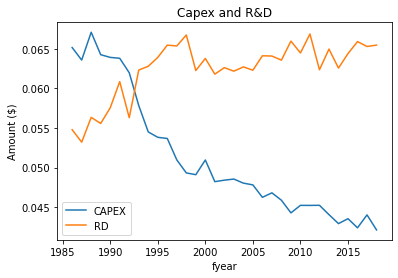

In [30]:
import matplotlib.pyplot as plt
plt.plot(m2['fyear'], m2['capxperc'], label='CAPEX')
plt.plot(m2['fyear'], m2['xrdperc'], label='RD')

# Add axis labels and a title
plt.xlabel('fyear')
plt.ylabel('Amount ($)')
plt.title('Capex and R&D')

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [31]:
conn = wrds.Connection (wrds_username='haochengyang')
comp3 = conn.raw_sql('''
                    SELECT gvkey,conm, fyear, datadate,sich,capx,xrd
                    FROM compa.funda
                    WHERE indfmt='INDL' 
                    AND datafmt='STD' 
                    AND popsrc='D' 
                    AND consol = 'C'
                    AND fyear > 1985 
                    AND fyear < 2019
                    AND sale > 10
                    AND prcc_f > 1
                    ''', 
                    date_cols=['datadate'])
comp3['fyear']=comp['fyear'].astype(int)
comp3['datadate']=comp['datadate']+MonthEnd(0)
comp3.describe(include='all')

Loading library list...
Done


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33624\2784391661.py:17: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  comp3.describe(include='all')


,gvkey,conm,fyear,datadate,sich,capx,xrd
count,189091,189091,189091.000000,189091,167427.000000,176511.000000,85368.000000
unique,19868,19866,NaN,396,NaN,NaN,NaN
top,003946,UNILEVER PLC,NaN,1999-12-31 00:00:00,NaN,NaN,NaN
freq,33,41,NaN,5076,NaN,NaN,NaN
first,NaN,NaN,NaN,1986-06-30 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-05-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,2002.005764,NaN,4758.425756,215.170869,120.321161
std,NaN,NaN,8.957861,NaN,1916.478674,1189.052574,637.552787
min,NaN,NaN,1986.000000,NaN,100.000000,-994.000000,-0.648000
25%,NaN,NaN,1995.000000,NaN,3490.000000,1.705000,0.143000


In [32]:
comp3

,gvkey,conm,fyear,datadate,sich,capx,xrd
0,001003,A.A. IMPORTING CO INC,1986,1987-01-31,NaN,0.548,NaN
1,001004,AAR CORP,1987,1988-01-31,NaN,10.688,NaN
2,001009,ABS INDUSTRIES INC,1988,1989-01-31,NaN,0.510,NaN
3,001012,ACS INDUSTRIES INC,1986,1987-05-31,NaN,1.796,0.189
4,001013,ADC TELECOMMUNICATIONS INC,1987,1988-05-31,NaN,10.085,12.982
...,...,...,...,...,...,...,...
189086,321467,WISEKEY INTERNATIONAL HOLD,2018,2018-12-31,3674.0,1.244,5.306
189087,326688,NVENT ELECTRIC PLC,2018,2018-12-31,3440.0,39.500,45.600
189088,327451,GRINDROD SHIPPING,2018,2018-12-31,4412.0,0.368,NaN
189089,328032,NAVIOS MARITIME CONTAINERS,2018,2018-12-31,4412.0,170.503,NaN


In [33]:

# Convert the 'fyear' column to a datetime object
comp3['fyear'] = pd.to_datetime(comp3['fyear'], format='%Y')

# Group the data by year and count the number of unique companies with XRD
xrd_companies_by_year = comp3[comp3['xrd'] > 0].groupby(comp3['fyear'].dt.year)['gvkey'].nunique()

# Print the results
print(xrd_companies_by_year)

fyear
1986    1179
1987    1210
1988    1153
1989    1169
1990    1131
1991    1198
1992    1310
1993    1634
1994    1710
1995    1836
1996    1936
1997    1918
1998    1906
1999    1962
2000    1803
2001    1743
2002    1635
2003    1710
2004    1713
2005    1720
2006    1683
2007    1636
2008    1516
2009    1475
2010    1474
2011    1480
2012    1481
2013    1418
2014    1445
2015    1452
2016    1420
2017    1407
2018    1368
Name: gvkey, dtype: int64


In [34]:

# Convert the 'fyear' column to a datetime object
comp3['fyear'] = pd.to_datetime(comp3['fyear'], format='%Y')

# Group the data by year and count the number of unique companies with XRD
capx_companies_by_year = comp3[comp3['capx'] > 0].groupby(comp3['fyear'].dt.year)['gvkey'].nunique()

# Print the results
print(capx_companies_by_year)

fyear
1986    3064
1987    3155
1988    3108
1989    3042
1990    3000
1991    3069
1992    3300
1993    3952
1994    4242
1995    4499
1996    4902
1997    5021
1998    4928
1999    4947
2000    4701
2001    4394
2002    4194
2003    4337
2004    4360
2005    4311
2006    4293
2007    4213
2008    3804
2009    3821
2010    3876
2011    3818
2012    3818
2013    3793
2014    3849
2015    3726
2016    3673
2017    3647
2018    3609
Name: gvkey, dtype: int64


In [35]:
merged_df = pd.merge(capx_companies_by_year, xrd_companies_by_year, left_index=True, right_index=True)
merged_df

,gvkey_x,gvkey_y
fyear,,
1986,3064,1179
1987,3155,1210
1988,3108,1153
1989,3042,1169
1990,3000,1131
1991,3069,1198
1992,3300,1310
1993,3952,1634
1994,4242,1710


In [36]:
merged_df.rename(columns = {"gvkey_x": "CAPEX"}, inplace= True)
merged_df.rename(columns = {"gvkey_y": "R&D"}, inplace= True)
merged_df

,CAPEX,R&D
fyear,,
1986,3064,1179
1987,3155,1210
1988,3108,1153
1989,3042,1169
1990,3000,1131
1991,3069,1198
1992,3300,1310
1993,3952,1634
1994,4242,1710


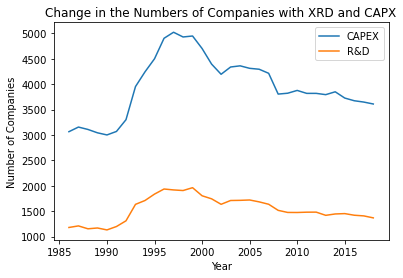

In [37]:
import matplotlib.pyplot as plt

merged_df.plot.line()

# Add a title and axis labels
plt.title('Change in the Numbers of Companies with XRD and CAPX')
plt.xlabel('Year')
plt.ylabel('Number of Companies')

# Show the plot
plt.show()
